## 배수 구하기, 입력 1개, 출력 1개
- 1, 2, 3, 4, 5
- 2, 4, 6, 8, 10
- 배수의 규칙을 찾아낸 모델의 제작

In [1]:
import warnings
warnings.filterwarnings(action='ignore')

import os
import time
# import cv2
import random

import numpy as np
import pandas as pd
import seaborn as sb
import tensorflow as tf

from tensorflow.keras.models import Sequential  # class
from tensorflow.keras.models import load_model  # model 사용
from tensorflow.keras.layers import Dense       # 전결합
from tensorflow.keras.layers import Dropout     # 특정 node를 사용안함.
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

from tensorflow.keras.callbacks import EarlyStopping   # 학습 자동 중지
from tensorflow.keras.callbacks import ModelCheckpoint # 우수한 학습 모델 파일 저장
from tensorflow.keras import regularizers 
from tensorflow.keras.utils import to_categorical   # one-hot 엔코딩
from tensorflow.keras.optimizers import Adam

from tensorflow.keras.datasets import mnist

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split # 학습셋과 테스트셋의 분리 지원
from sklearn.model_selection import StratifiedKFold  # K겹 교차 검증

from PIL import Image

import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import font_manager, rc

import platform 
# Windows, Linux, Darwin
if (platform.system() == 'Windows'):  
    rc('font', family=font_manager.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name())
    path = '.' # Local
else:    
    rc('font', family='NanumBarunGothic')  # Ubuntu 18.04 기준 한글 처리
    path = '/content/drive/My Drive/kd_ml/dnn/click' # Colab

os.chdir(path) # 기본 경로 설정

plt.rcParams["font.size"] = 12         # 글자 크기
plt.rcParams["figure.figsize"] = (6, 3) # 10:4의 그래프 비율
plt.rcParams['axes.unicode_minus'] = False  # minus 부호는 unicode 적용시 한글이 깨짐으로 설정

%matplotlib inline

# ---------------------------------------------------------------------
# gpu 사용시 런타임에서 필요한 양만큼의 GPU 메모리를 할당후 자동 증가 처리
# OS 메모리도 초기화됨.
# ---------------------------------------------------------------------
import tensorflow as tf

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_memory_growth(gpus[0], True)
    except RuntimeError as e:
        # 프로그램 시작시에 메모리 증가가 설정되어야만 합니다
        print(e)
    
# ---------------------------------------------------------------------

In [2]:
print([i for i in range(1, 21)])

# 독립 변수 -> 규칙 -> 종속 변수
x_train = np.array([i for i in range(1, 21)]) # 데이터
print(x_train) # 독립 변수, 원인 변수

y_train = np.array([i*2 for i in range(1, 21)]) # 정답, 실제값, Target
print(y_train) # 종속 변수, 결과 변수

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]
[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20]
[ 2  4  6  8 10 12 14 16 18 20 22 24 26 28 30 32 34 36 38 40]


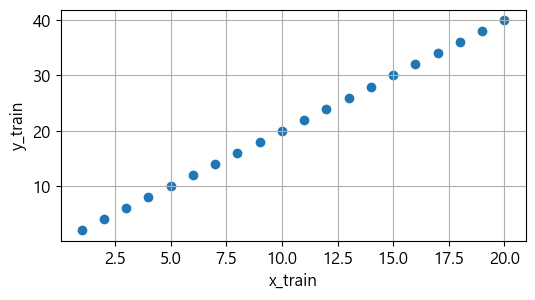

In [3]:
plt.scatter(x_train, y_train)
plt.xlabel('x_train')
plt.ylabel('y_train')
plt.grid(True)
plt.show()

In [4]:
# 뉴런이 1개 있는 경우
SEED = 0
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

tf.random.set_seed(SEED) # Global seed
np.random.seed(SEED)
random.seed(SEED)

model = Sequential()
model.add(Dense(1, input_dim=1, activation='linear', name='layer1'))
model.compile(optimizer='adam', loss='mse')
model.summary()
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                epochs=10, batch_size=1)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
16/16 [==============================] - 1s 14ms/step - loss: 688.8017 - val_loss: 2517.6113
Epoch 2/10
16/16 [==============================] - 0s 6ms/step - loss: 681.7148 - val_loss: 2494.6990
Epoch 3/10
16/16 [==============================] - 0s 5ms/step - loss: 675.3380 - val_loss: 2469.9370
Epoch 4/10
16/16 [==============================] - 0s 6ms/step - loss: 668.9377 - val_loss: 2445.4971
Epoch 5/10
16/16 [==============================] - 0s 6ms/step - loss: 661.6957 - val_loss: 2424.0601
Epoch 6/10
16/16 [==============================] - 0s 5ms/step - loss: 65

In [6]:
# 네트워크 데이터 입출력 갯수 시각화
# from tensorflow.keras.utils import plot_model   
# plot_model(model, to_file='./Basic1.png', show_shapes=True, show_layer_names=True)

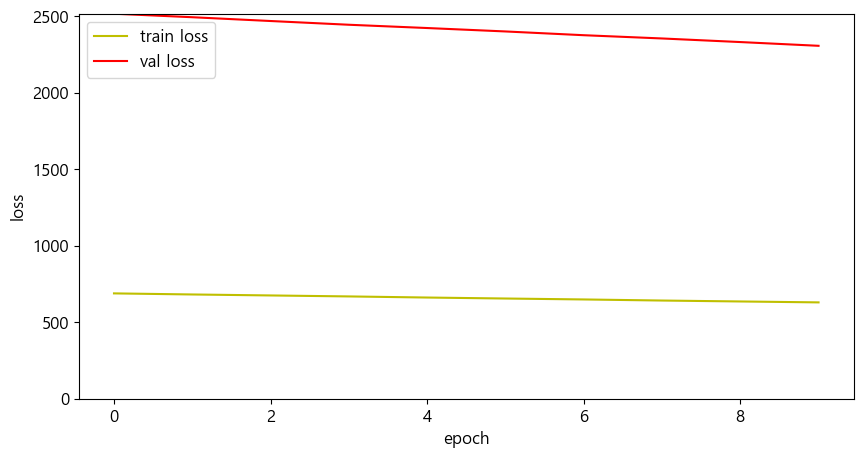

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 2517.6113]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.

# 과소 적합: 훈련이 부족해서 오차가 큼

In [8]:
# node(뉴런)가 3개 있는 경우
SEED = 0
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

tf.random.set_seed(SEED) # Global seed
np.random.seed(SEED)
random.seed(SEED)

model = Sequential()
model.add(Dense(3, input_dim=1, activation='linear', name='layer1'))
model.add(Dense(1, activation='linear', name='layer2'))
model.compile(optimizer='adam', loss='mse')
model.summary()
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                 epochs=10, batch_size=1)


Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 3)                 6         
                                                                 
 layer2 (Dense)              (None, 1)                 4         
                                                                 
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
16/16 [==============================] - 0s 13ms/step - loss: 205.2791 - val_loss: 732.8774
Epoch 2/10
16/16 [==============================] - 0s 6ms/step - loss: 193.7533 - val_loss: 695.7851
Epoch 3/10
16/16 [==============================] - 0s 6ms/step - loss: 183.5847 - val_loss: 656.4617
Epoch 4/10
16/16 [==============================] - 0s 6ms/step - loss: 173.5817 - val_loss: 618.4760
Epoch 5/10
16/16 [===========================

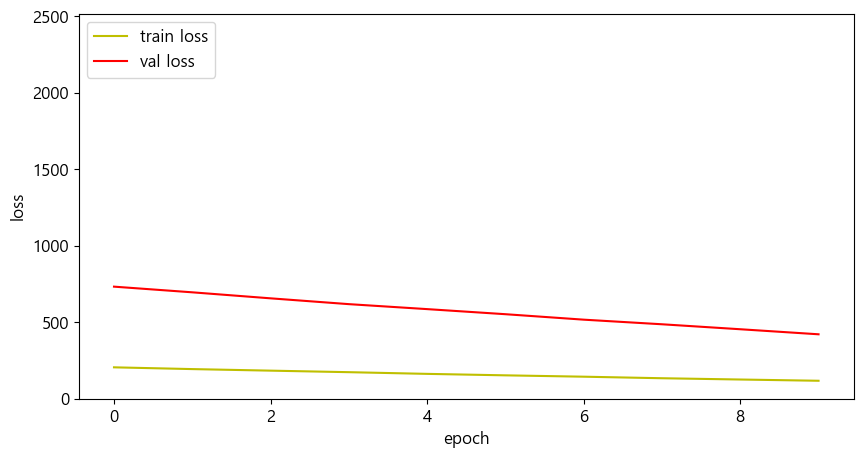

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 2517.6113]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.
 

In [10]:
# 테스트 데이터 준비, 훈련/검증에 사용하지 않은 데이터
x = np.array([51, 52, 53, 54, 55])
print(x.shape)  # (5,)

y = x * 2  # 비교 목적
print('찾아야할 값:', y)

p = model.predict(x) # 모델 사용, 예측
print(type(p)) # <class 'numpy.ndarray'>
print(p.shape) # (5, 1): Output Shape: (None, 1)
print(p)

(5,)
찾아야할 값: [102 104 106 108 110]
<class 'numpy.ndarray'>
(5, 1)
[[44.844265]
 [45.716007]
 [46.58774 ]
 [47.459484]
 [48.33122 ]]


In [11]:
for i in range(len(x)):
    fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.10f}, 정제된값: {3:.0f}'
    print(fmt.format(x[i], y[i], p[i][0], p[i][0]))

x: 51, 실제값: 102, 예측값: 44.8442649841, 정제된값: 45
x: 52, 실제값: 104, 예측값: 45.7160072327, 정제된값: 46
x: 53, 실제값: 106, 예측값: 46.5877418518, 정제된값: 47
x: 54, 실제값: 108, 예측값: 47.4594841003, 정제된값: 47
x: 55, 실제값: 110, 예측값: 48.3312187195, 정제된값: 48


In [44]:
# 네트워크 규모 확대, 노드수를 증가시켜 정답 찾음, 메모리가 많아야함.
SEED = 0
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

tf.random.set_seed(SEED) # Global seed
np.random.seed(SEED)
random.seed(SEED)

model = Sequential()
model.add(Dense(100000, input_dim=1, activation='linear', name='layer1'))
model.add(Dense(1, activation='linear', name='layer2'))
model.compile(optimizer='adam', loss='mse')
model.summary()
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                 epochs=10, batch_size=1)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 100000)            200000    
                                                                 
 layer2 (Dense)              (None, 1)                 100001    
                                                                 
Total params: 300,001
Trainable params: 300,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
16/16 [==============================] - 1s 13ms/step - loss: 59.6015 - val_loss: 1.1951
Epoch 2/10
16/16 [==============================] - 0s 6ms/step - loss: 3.4354 - val_loss: 7.7857
Epoch 3/10
16/16 [==============================] - 0s 6ms/step - loss: 1.3267 - val_loss: 0.1823
Epoch 4/10
16/16 [==============================] - 0s 6ms/step - loss: 0.1364 - val_loss: 0.1238
Epoch 5/10
16/16 [==============================]

In [61]:
# 네트워크 규모 확대, epochs를 증가시켜 정답 찾음, 처리 속도가 고속이어야함.
SEED = 0
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

tf.random.set_seed(SEED) # Global seed
np.random.seed(SEED)
random.seed(SEED)

model = Sequential()
model.add(Dense(2, input_dim=1, activation='linear', name='layer1'))
model.add(Dense(1, activation='linear', name='layer2'))
model.compile(optimizer='adam', loss='mse')
model.summary()
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                 epochs=400, batch_size=1)

Model: "sequential_14"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 2)                 4         
                                                                 
 layer2 (Dense)              (None, 1)                 3         
                                                                 
Total params: 7
Trainable params: 7
Non-trainable params: 0
_________________________________________________________________
Epoch 1/400
16/16 [==============================] - 0s 13ms/step - loss: 189.3478 - val_loss: 679.7811
Epoch 2/400
16/16 [==============================] - 0s 6ms/step - loss: 180.8144 - val_loss: 652.3011
Epoch 3/400
16/16 [==============================] - 0s 6ms/step - loss: 173.3100 - val_loss: 623.2581
Epoch 4/400
16/16 [==============================] - 0s 6ms/step - loss: 165.9449 - val_loss: 595.2808
Epoch 5/400
16/16 [=======================

Epoch 75/400
16/16 [==============================] - 0s 6ms/step - loss: 0.3239 - val_loss: 0.9618
Epoch 76/400
16/16 [==============================] - 0s 6ms/step - loss: 0.3188 - val_loss: 0.9336
Epoch 77/400
16/16 [==============================] - 0s 6ms/step - loss: 0.3163 - val_loss: 0.9068
Epoch 78/400
16/16 [==============================] - 0s 7ms/step - loss: 0.3148 - val_loss: 0.8699
Epoch 79/400
16/16 [==============================] - 0s 6ms/step - loss: 0.3124 - val_loss: 0.8453
Epoch 80/400
16/16 [==============================] - 0s 7ms/step - loss: 0.3110 - val_loss: 0.8375
Epoch 81/400
16/16 [==============================] - 0s 6ms/step - loss: 0.3088 - val_loss: 0.8155
Epoch 82/400
16/16 [==============================] - 0s 6ms/step - loss: 0.3070 - val_loss: 0.7882
Epoch 83/400
16/16 [==============================] - 0s 6ms/step - loss: 0.3058 - val_loss: 0.7920
Epoch 84/400
16/16 [==============================] - 0s 6ms/step - loss: 0.3051 - val_loss: 0.7443


16/16 [==============================] - 0s 6ms/step - loss: 0.1849 - val_loss: 0.4087
Epoch 157/400
16/16 [==============================] - 0s 6ms/step - loss: 0.1849 - val_loss: 0.4410
Epoch 158/400
16/16 [==============================] - 0s 6ms/step - loss: 0.1808 - val_loss: 0.4296
Epoch 159/400
16/16 [==============================] - 0s 6ms/step - loss: 0.1790 - val_loss: 0.4050
Epoch 160/400
16/16 [==============================] - 0s 6ms/step - loss: 0.1777 - val_loss: 0.3839
Epoch 161/400
16/16 [==============================] - 0s 6ms/step - loss: 0.1757 - val_loss: 0.3820
Epoch 162/400
16/16 [==============================] - 0s 6ms/step - loss: 0.1745 - val_loss: 0.3806
Epoch 163/400
16/16 [==============================] - 0s 6ms/step - loss: 0.1722 - val_loss: 0.3866
Epoch 164/400
16/16 [==============================] - 0s 6ms/step - loss: 0.1706 - val_loss: 0.3979
Epoch 165/400
16/16 [==============================] - 0s 6ms/step - loss: 0.1692 - val_loss: 0.3795
Epoc

16/16 [==============================] - 0s 6ms/step - loss: 0.0620 - val_loss: 0.1369
Epoch 238/400
16/16 [==============================] - 0s 6ms/step - loss: 0.0614 - val_loss: 0.1252
Epoch 239/400
16/16 [==============================] - 0s 6ms/step - loss: 0.0611 - val_loss: 0.1456
Epoch 240/400
16/16 [==============================] - 0s 6ms/step - loss: 0.0589 - val_loss: 0.1241
Epoch 241/400
16/16 [==============================] - 0s 6ms/step - loss: 0.0582 - val_loss: 0.1339
Epoch 242/400
16/16 [==============================] - 0s 6ms/step - loss: 0.0565 - val_loss: 0.1274
Epoch 243/400
16/16 [==============================] - 0s 6ms/step - loss: 0.0555 - val_loss: 0.1234
Epoch 244/400
16/16 [==============================] - 0s 6ms/step - loss: 0.0548 - val_loss: 0.1077
Epoch 245/400
16/16 [==============================] - 0s 6ms/step - loss: 0.0534 - val_loss: 0.1136
Epoch 246/400
16/16 [==============================] - 0s 6ms/step - loss: 0.0532 - val_loss: 0.1278
Epoc

16/16 [==============================] - 0s 6ms/step - loss: 0.0075 - val_loss: 0.0142
Epoch 319/400
16/16 [==============================] - 0s 6ms/step - loss: 0.0072 - val_loss: 0.0146
Epoch 320/400
16/16 [==============================] - 0s 6ms/step - loss: 0.0069 - val_loss: 0.0150
Epoch 321/400
16/16 [==============================] - 0s 6ms/step - loss: 0.0068 - val_loss: 0.0166
Epoch 322/400
16/16 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.0131
Epoch 323/400
16/16 [==============================] - 0s 6ms/step - loss: 0.0065 - val_loss: 0.0162
Epoch 324/400
16/16 [==============================] - 0s 6ms/step - loss: 0.0059 - val_loss: 0.0123
Epoch 325/400
16/16 [==============================] - 0s 6ms/step - loss: 0.0058 - val_loss: 0.0099
Epoch 326/400
16/16 [==============================] - 0s 6ms/step - loss: 0.0057 - val_loss: 0.0114
Epoch 327/400
16/16 [==============================] - 0s 5ms/step - loss: 0.0054 - val_loss: 0.0108
Epoc

16/16 [==============================] - 0s 6ms/step - loss: 1.3579e-04 - val_loss: 2.2342e-04
Epoch 398/400
16/16 [==============================] - 0s 6ms/step - loss: 1.2921e-04 - val_loss: 2.4353e-04
Epoch 399/400
16/16 [==============================] - 0s 6ms/step - loss: 1.1860e-04 - val_loss: 2.0165e-04
Epoch 400/400
16/16 [==============================] - 0s 6ms/step - loss: 1.0870e-04 - val_loss: 2.3250e-04


In [153]:
# 네트워크 규모 확대, Node, epochs를 증가시켜 정답 찾음
SEED = 0
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

tf.random.set_seed(SEED) # Global seed
np.random.seed(SEED)
random.seed(SEED)

model = Sequential()
model.add(Dense(5000, input_dim=1, activation='linear', name='layer1'))
model.add(Dense(1, activation='linear', name='layer2'))
model.compile(optimizer='adam', loss='mse')
model.summary()
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                 epochs=30, batch_size=1)

Model: "sequential_37"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 5000)              10000     
                                                                 
 layer2 (Dense)              (None, 1)                 5001      
                                                                 
Total params: 15,001
Trainable params: 15,001
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
16/16 [==============================] - 0s 13ms/step - loss: 120.5306 - val_loss: 1.6553
Epoch 2/30
16/16 [==============================] - 0s 6ms/step - loss: 13.4517 - val_loss: 9.9550
Epoch 3/30
16/16 [==============================] - 0s 6ms/step - loss: 2.4921 - val_loss: 14.0009
Epoch 4/30
16/16 [==============================] - 0s 6ms/step - loss: 1.7290 - val_loss: 1.5966
Epoch 5/30
16/16 [==============================

In [164]:
# 네트워크 규모 확대, Node, epochs를 증가시켜 정답 찾음
SEED = 0
os.environ['PYTHONHASHSEED'] = str(SEED)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

tf.random.set_seed(SEED) # Global seed
np.random.seed(SEED)
random.seed(SEED)

model = Sequential()
model.add(Dense(130, input_dim=1, activation='linear', name='layer1'))
model.add(Dense(80, activation='linear', name='layer2'))
model.add(Dense(60, activation='linear', name='layer3'))
model.add(Dense(1, activation='linear', name='layer4'))
model.compile(optimizer='adam', loss='mse')
model.summary()
hist = model.fit(x_train, y_train, validation_split=0.2, shuffle=True,
                 epochs=30, batch_size=1)

Model: "sequential_40"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 layer1 (Dense)              (None, 130)               260       
                                                                 
 layer2 (Dense)              (None, 80)                10480     
                                                                 
 layer3 (Dense)              (None, 60)                4860      
                                                                 
 layer4 (Dense)              (None, 1)                 61        
                                                                 
Total params: 15,661
Trainable params: 15,661
Non-trainable params: 0
_________________________________________________________________
Epoch 1/30
16/16 [==============================] - 1s 15ms/step - loss: 108.5111 - val_loss: 107.0647
Epoch 2/30
16/16 [==============================] - 0s 8ms/step - loss: 11.156

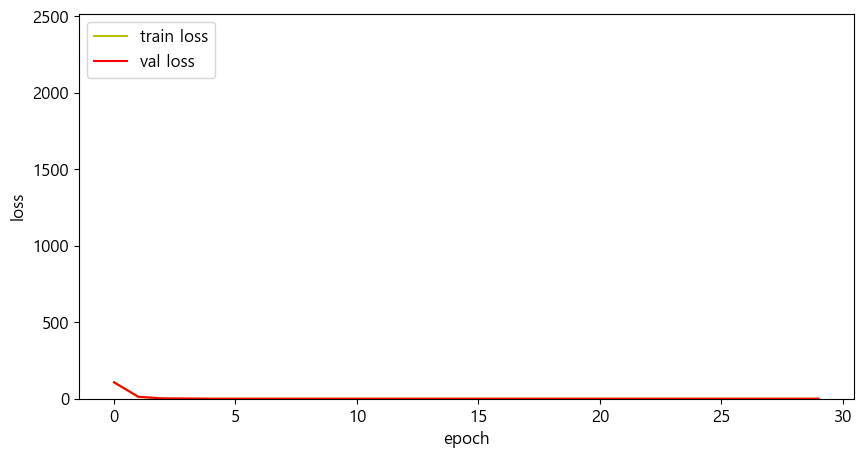

In [165]:
import matplotlib.pyplot as plt
%matplotlib inline  

fig, loss_ax = plt.subplots()
# plt.figure(figsize=(6,4)) # ERROR
fig.set_size_inches(10, 5)  # 챠트 크기 설정

# 왼쪽 y 축 설정
loss_ax.plot(hist.history['loss'], 'y', label='train loss')
loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')
loss_ax.set_ylim([0.0, 2517.6113]) # 값을 반영하여 변경 ★

# 축 레이블 설정
loss_ax.set_xlabel('epoch')  # 학습 횟수
loss_ax.set_ylabel('loss')   # 오차

loss_ax.legend(loc='upper left') # 오차 레이블 위치

plt.show()
# train loss: 하강하면 훈련이 정상적으로 진행되고 있음
# val loss: 하강하면 훈련되지 않은 데이터를 대상으로 한 테스트도 정상적으로 진행됨.
 

In [166]:
# 테스트 데이터 준비, 훈련/검증에 사용하지 않은 데이터
x = np.array([51, 52, 53, 54, 55])
print(x.shape)  # (5,)

y = x * 2  # 비교 목적
print('찾아야할 값:', y)

p = model.predict(x) # 모델 사용, 예측

for i in range(len(x)):
    fmt = 'x: {0}, 실제값: {1}, 예측값: {2:.10f}, 정제된값: {3:.0f}'
    print(fmt.format(x[i], y[i], p[i][0], p[i][0]))

(5,)
찾아야할 값: [102 104 106 108 110]
x: 51, 실제값: 102, 예측값: 101.9691390991, 정제된값: 102
x: 52, 실제값: 104, 예측값: 103.9678115845, 정제된값: 104
x: 53, 실제값: 106, 예측값: 105.9664916992, 정제된값: 106
x: 54, 실제값: 108, 예측값: 107.9651718140, 정제된값: 108
x: 55, 실제값: 110, 예측값: 109.9638595581, 정제된값: 110


In [167]:
# ChatGPT 3: 1750 억개, 인간의 언어와 지식은 규칙성이 있어서 가능
# ChatGPT 4: 1~100 조개, 더욱 섬세한 인간의 언어와 지식을 습득함, 컨설팅 가능.
# 인간: 1000 조개